

1.   Sree Charan Reddy Gangireddy
2.   862327313
3. sgang011@ucr.edu



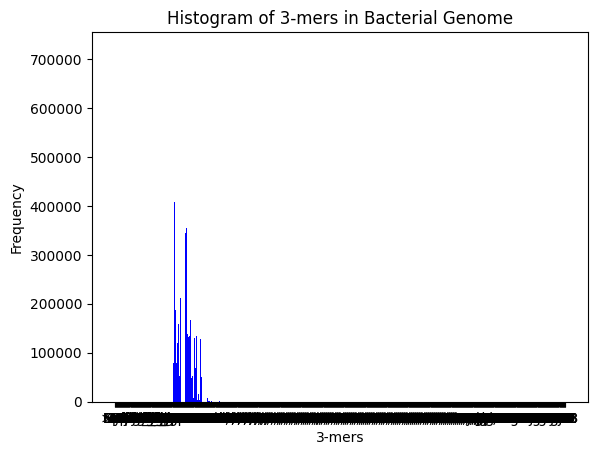

In [4]:
# Import necessary libraries
from collections import defaultdict
import matplotlib.pyplot as plt
import urllib.request
import gzip

# Define function to create histogram of k-mers in a given sequence
def kmer_hist(seq, k):
    kmers = defaultdict(int)
    for i in range(len(seq) - k + 1):
        kmers[seq[i:i+k]] += 1
    return kmers

# Download and extract bacterial genome
url = "https://ftp.ncbi.nlm.nih.gov/genomes/genbank/bacteria/Streptomyces_californicus/latest_assembly_versions/GCA_000715715.1_ASM71571v1/GCA_000715715.1_ASM71571v1_genomic.fna.gz"
filename = "GCA_000715715.1_ASM71571v1_genomic.fna.gz"

urllib.request.urlretrieve(url, filename)

with gzip.open(filename, 'rt') as f:
    genome = f.read().replace('\n', '')

# Create histogram of 3-mers in bacterial genome
kmer_counts = kmer_hist(genome, 3)

# Plot histogram
plt.bar(kmer_counts.keys(), kmer_counts.values(), color='blue')
plt.title("Histogram of 3-mers in Bacterial Genome")
plt.xlabel("3-mers")
plt.ylabel("Frequency")
plt.show()

#Reference: ChatGPT



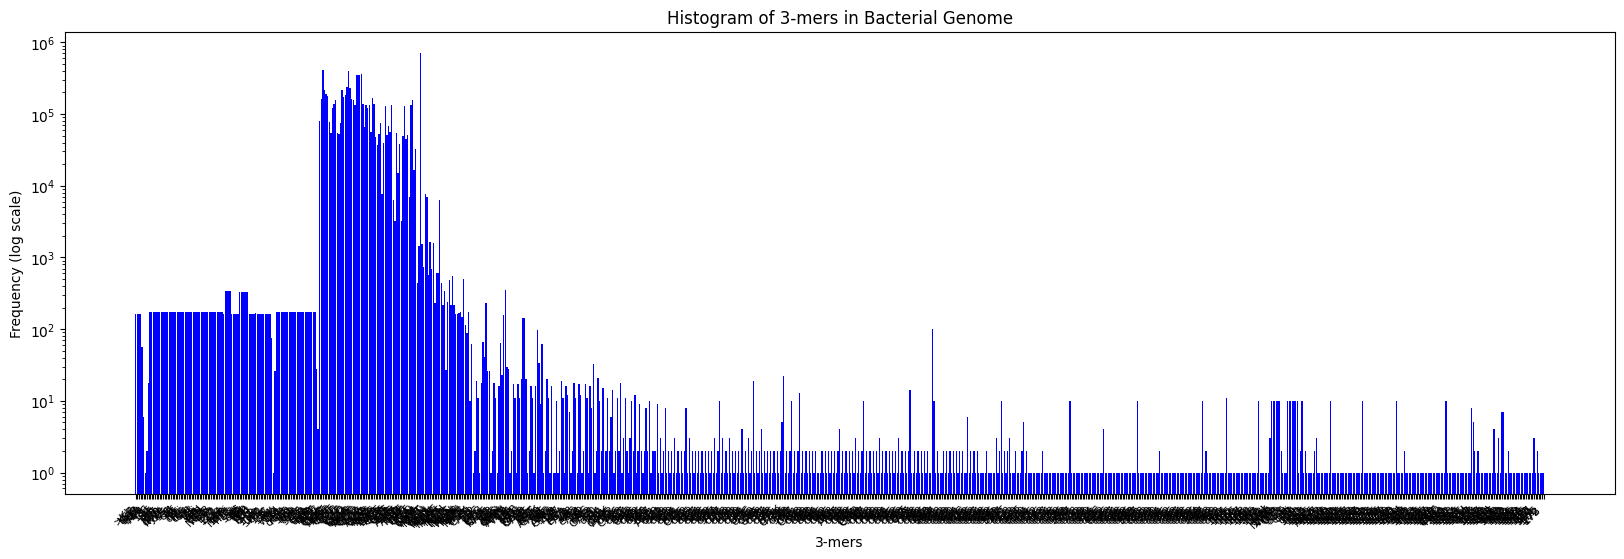

In [10]:
# More readable graph with logarithmic scale on y axis
plt.figure(figsize=(20, 6))  # increase figure size
plt.bar(kmer_counts.keys(), kmer_counts.values(), color='blue')
plt.title("Histogram of 3-mers in Bacterial Genome")
plt.xlabel("3-mers")
plt.ylabel("Frequency (log scale)")
plt.xticks(rotation=45, ha='right', fontsize=8)  # rotate x-axis labels and reduce font size
plt.yscale('log')
plt.show()

#Reference: ChatGPT

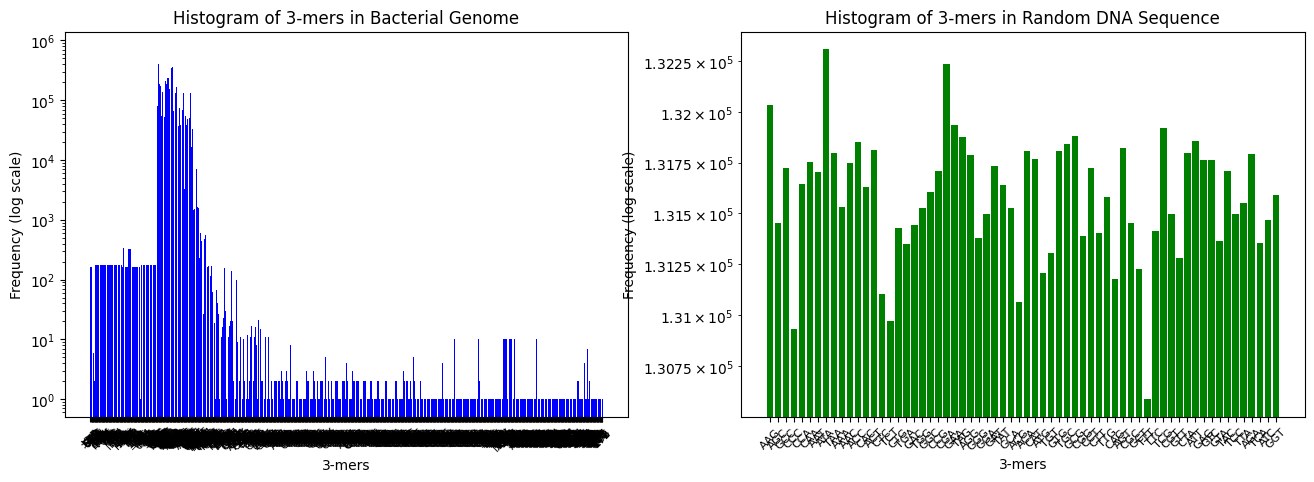

In [20]:
# Generate random DNA sequence of same length as bacterial genome
import random
random.seed(42)

random_genome = ''.join([random.choice('ACGT') for _ in range(len(genome))])

# Calculate 3-mer histograms for bacterial genome and random genome
bacterial_kmer_counts = kmer_hist(genome, 3)
random_kmer_counts = kmer_hist(random_genome, 3)

# Plot histograms side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].bar(bacterial_kmer_counts.keys(), bacterial_kmer_counts.values(), color='blue')
axs[0].set_title("Histogram of 3-mers in Bacterial Genome")
axs[0].set_xlabel("3-mers")
axs[0].set_ylabel("Frequency (log scale)")
axs[0].set_yscale('log')
axs[0].tick_params(axis='x', rotation=45, labelsize=8)

axs[1].bar(random_kmer_counts.keys(), random_kmer_counts.values(), color='green')
axs[1].set_title("Histogram of 3-mers in Random DNA Sequence")
axs[1].set_xlabel("3-mers")
axs[1].set_ylabel("Frequency (log scale)")
axs[1].set_yscale('log')
axs[1].tick_params(axis='x', rotation=45, labelsize=8)

plt.show()

#Reference: ChatGPT

In [12]:
from collections import Counter

# Get the 10 most common 3-mers in the bacterial genome
kmer_counts = kmer_hist(genome, 3)
top_kmers = Counter(kmer_counts).most_common(10)

print("Top 10 most common 3-mers in the bacterial genome:")
for kmer, count in top_kmers:
    print(f"{kmer}: {count} occurrences")

# Attempt to interpret the biological meaning of the most common 3-mers
codons = {
    'ATA': 'I', 'ATC': 'I', 'ATT': 'I', 'ATG': 'M',
    'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
    'AAC': 'N', 'AAT': 'N', 'AAA': 'K', 'AAG': 'K',
    'AGC': 'S', 'AGT': 'S', 'AGA': 'R', 'AGG': 'R',                
    'CTA': 'L', 'CTC': 'L', 'CTG': 'L', 'CTT': 'L',
    'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
    'CAC': 'H', 'CAT': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGT': 'R',
    'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
    'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
    'GAC': 'D', 'GAT': 'D', 'GAA': 'E', 'GAG': 'E',
    'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G',
    'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
    'TTC': 'F', 'TTT': 'F', 'TTA': 'L', 'TTG': 'L',
    'TAC': 'Y', 'TAT': 'Y', 'TAA': '*', 'TAG': '*',
    'TGC': 'C', 'TGT': 'C', 'TGA': '*', 'TGG': 'W',
}

print("\nPotential biological meanings of the most common 3-mers:")
for kmer, count in top_kmers:
    aa1 = codons.get(kmer[0:3])
    aa2 = codons.get(kmer[1:4])
    print(f"{kmer}: amino acids {aa1} and {aa2} (if in a coding region)")


#Reference: ChatGPT


Top 10 most common 3-mers in the bacterial genome:
NNN: 718826 occurrences
CCG: 408520 occurrences
CGG: 402655 occurrences
CGC: 359081 occurrences
GCG: 354219 occurrences
GCC: 345019 occurrences
GGC: 344686 occurrences
CCC: 238010 occurrences
GGG: 232402 occurrences
CGA: 214121 occurrences

Potential biological meanings of the most common 3-mers:
NNN: amino acids None and None (if in a coding region)
CCG: amino acids P and None (if in a coding region)
CGG: amino acids R and None (if in a coding region)
CGC: amino acids R and None (if in a coding region)
GCG: amino acids A and None (if in a coding region)
GCC: amino acids A and None (if in a coding region)
GGC: amino acids G and None (if in a coding region)
CCC: amino acids P and None (if in a coding region)
GGG: amino acids G and None (if in a coding region)
CGA: amino acids R and None (if in a coding region)


In [18]:
random_kmers_count = Counter(random_kmer_counts).most_common(10)
#print(top_random_kmers)
for kmer, count in random_kmers_count:
    print(f"{kmer}: {count} occurrences")

ATA: 132311 occurrences
CGA: 132236 occurrences
AAG: 132032 occurrences
GAA: 131937 occurrences
TCG: 131921 occurrences
GCG: 131880 occurrences
TAG: 131877 occurrences
ATT: 131857 occurrences
ACC: 131852 occurrences
TGC: 131843 occurrences


#From the above graphs and the number of occurences of codons between bacterial genome and random dna, we could say that the 3-mer distribution of the bacterial genome is non-random and could be influenced by various factors such as codon bias, gene regulation, or DNA replication.